In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

import warnings
warnings.filterwarnings('ignore')

In [16]:
train_dir = "C:/Users/choub/Downloads/Laliga teams splitted/train"
test_dir = "C:/Users/choub/Downloads/Laliga teams splitted/val"

train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1280 images belonging to 20 classes.
Found 320 images belonging to 20 classes.


In [17]:
training_set.class_indices

{'Athletic Bilbao': 0,
 'Atletico Madrid': 1,
 'Barcelona': 2,
 'Celta Vigo': 3,
 'Deportivo Alaves': 4,
 'Espanyol': 5,
 'Getafe': 6,
 'Girona': 7,
 'Las Palmas': 8,
 'Leganes': 9,
 'Mallorca': 10,
 'Osasuna': 11,
 'Rayo Vallecano': 12,
 'Real Betis': 13,
 'Real Madrid': 14,
 'Real Sociedad': 15,
 'Real Valladolid': 16,
 'Sevilla': 17,
 'Valencia': 18,
 'Villarreal': 19}

In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
result = model.fit(
    training_set,
    epochs=10,
    validation_data=test_set)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 529ms/step - accuracy: 0.1761 - loss: 2.7665 - val_accuracy: 0.9350 - val_loss: 0.5314
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 491ms/step - accuracy: 0.7981 - loss: 0.6591 - val_accuracy: 1.0000 - val_loss: 0.0345
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 476ms/step - accuracy: 0.9244 - loss: 0.2392 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 474ms/step - accuracy: 0.9676 - loss: 0.0902 - val_accuracy: 0.9975 - val_loss: 0.0057
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 471ms/step - accuracy: 0.9766 - loss: 0.0856 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 469ms/step - accuracy: 0.9759 - loss: 0.0775 - val_accuracy: 1.0000 - val_loss: 7.9053e-04
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 484ms/step - accuracy: 0.9723 - loss: 0.0714 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 471ms/step - accuracy: 0.9764 - loss: 0.0807 - val_

In [21]:
model.save('Logo_model.h5')

In [22]:
from keras.models import load_model
import tensorflow as tf
from keras_preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [23]:
reload_model = load_model("Logo_model.h5")

In [24]:
model = tf.keras.models.load_model("Logo_model.h5")


def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]  # Get the predicted class index

    # Map the predicted index to the class label
    class_labels = {v: k for k, v in training_set.class_indices.items()}  # Get the class labels from the training generator
    predicted_class_label = class_labels[predicted_class_index]  # Convert index to label

    # Display image and prediction
    plt.imshow(image.load_img(img_path))
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class_label}")
    plt.show()

    # Print the predicted class label
    print(f"Predicted label: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


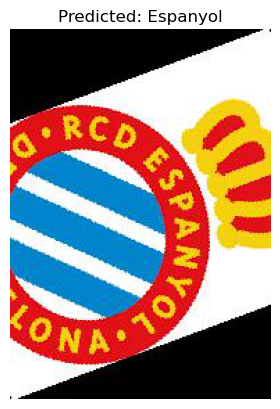

Predicted label: Espanyol


In [29]:
a = "C:/Users/choub/Downloads/Laliga teams splitted/train/Espanyol/img80.jpg"
predict_image(a)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


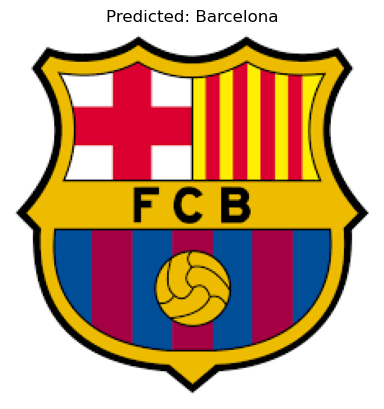

Predicted label: Barcelona


In [32]:
b = "C:/Users/choub/Downloads/download.png"
predict_image(b)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


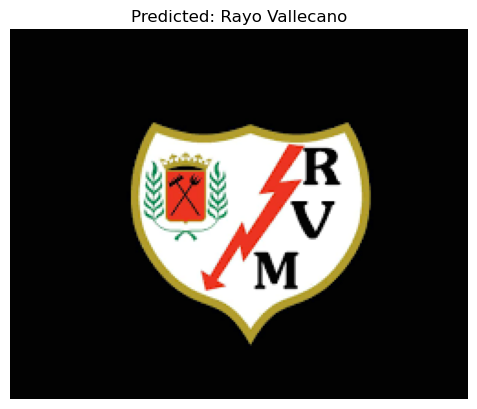

Predicted label: Rayo Vallecano


In [34]:
c = "C:/Users/choub/Downloads/download (1).png"
predict_image(c)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


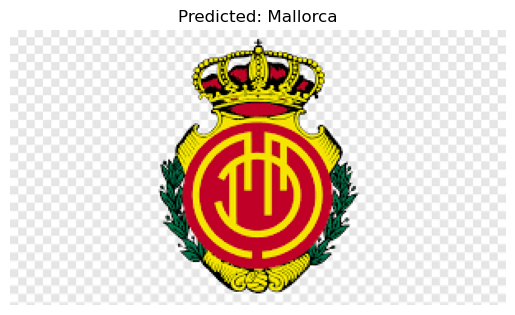

Predicted label: Mallorca


In [36]:
d = "C:/Users/choub/Downloads/images.png"
predict_image(d)